In [1]:
import pandas as pd
df=pd.read_csv('DATA/Final_data.csv')

In [2]:
df.head()

,ECRAN,RAM,POIDS,PRIX,STOCKAGESSD,STOCKAGEHDD,STOCKAGEFlash,_Acer,_Apple,_Asus,...,Unnamed: 12,intel,amd,ryzen,CPU_amd,CPU_intel,Grapihque_Intel HD Graphiques,Grapihque_Intel UHD Graphics 620,Grapihque_Nvidia Quadro,Grapihque_carte graphiques intégré
0,13.3,8,1.37,8565.441984,128.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.3,8,1.34,5747.462784,0.0,0.0,128.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.6,8,1.86,3676.320000,256.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.4,16,1.83,16223.440320,512.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.3,8,1.37,11531.496960,256.0,0.0,0.0,0.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


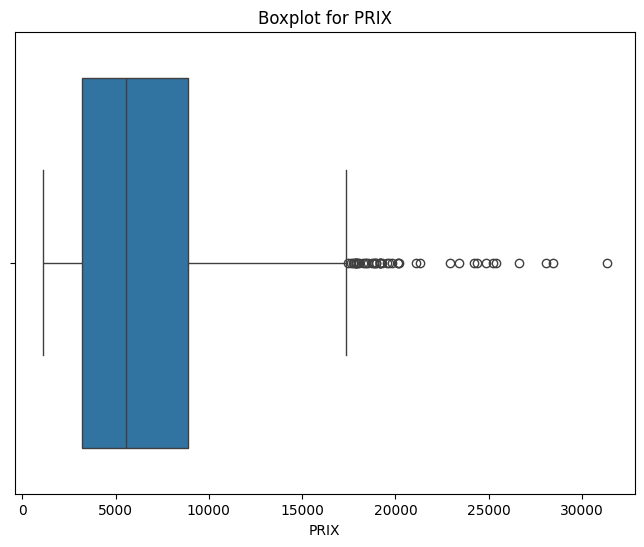

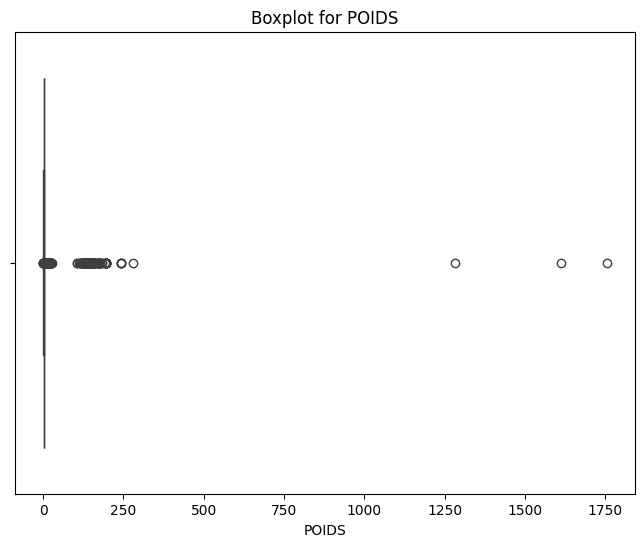

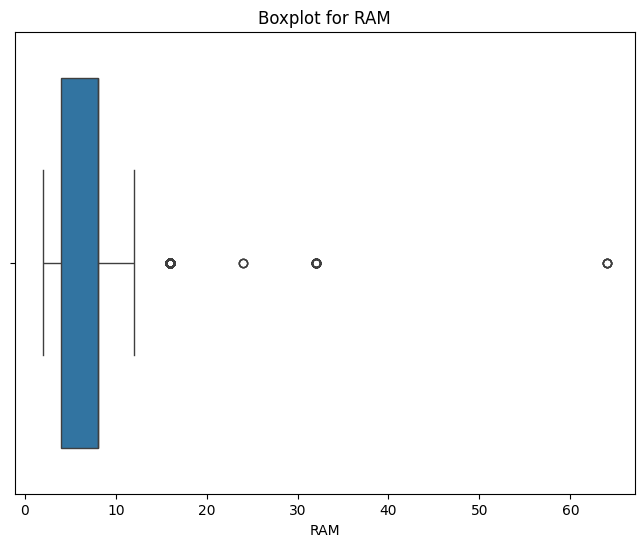

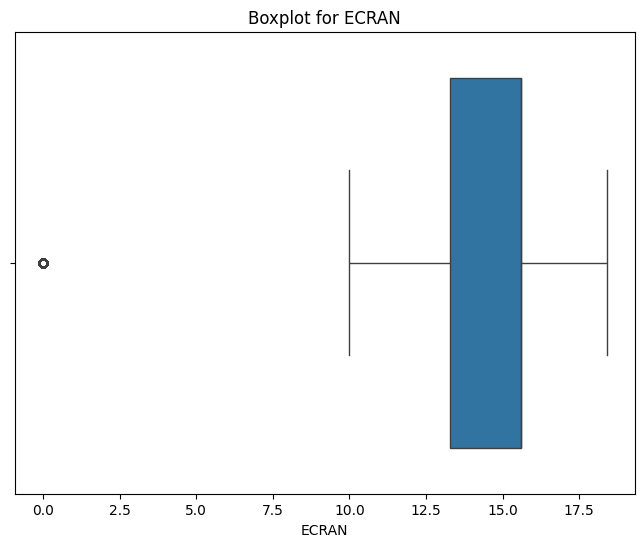

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['PRIX', 'POIDS', 'RAM','ECRAN']  # Replace with your actual column names

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [4]:
df['RAM'].value_counts()

RAM
8     729
4     412
16    252
6      37
12     31
32     31
2      20
64      5
24      3
Name: count, dtype: int64

In [6]:
df['POIDS'] = df['POIDS'].apply(lambda x: 0 if x > 10 else x)

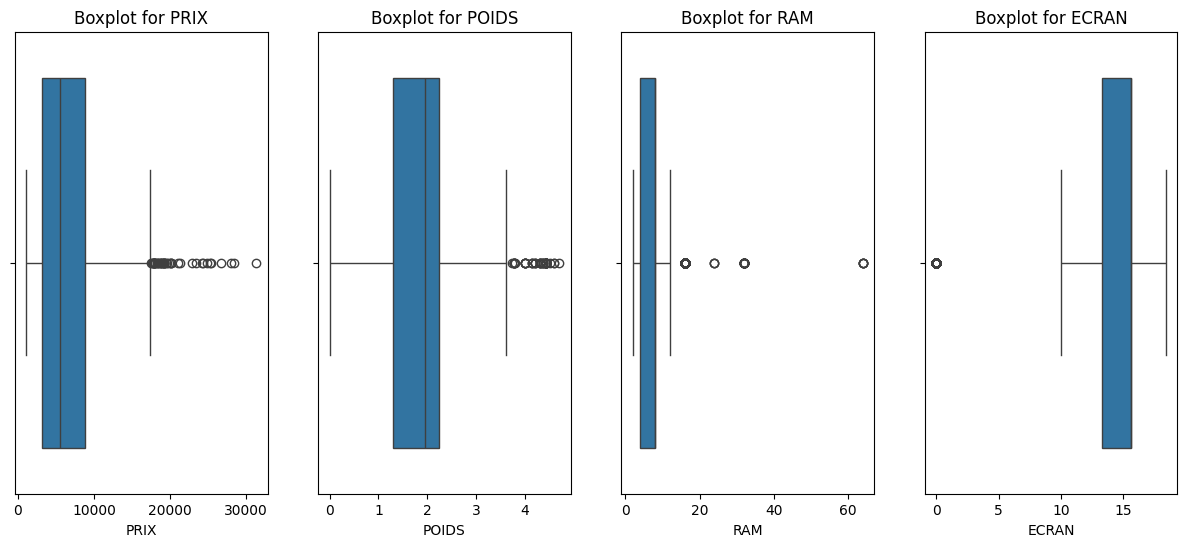

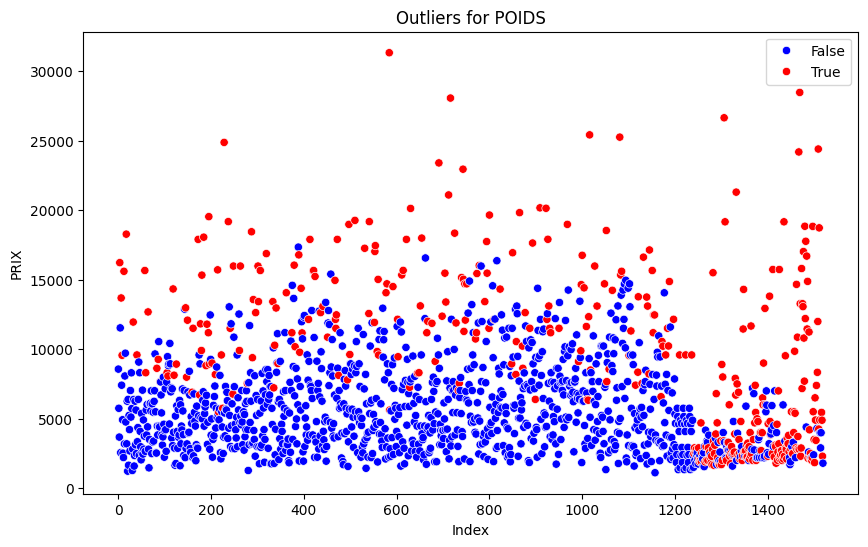

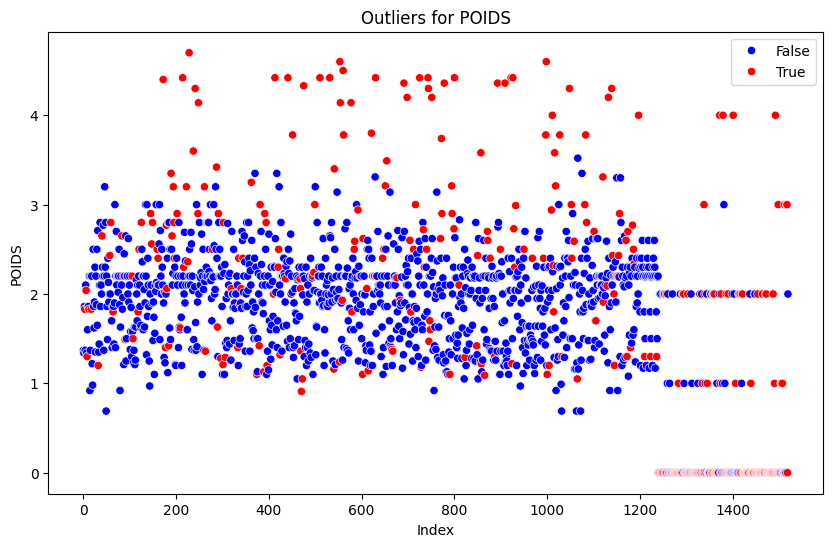

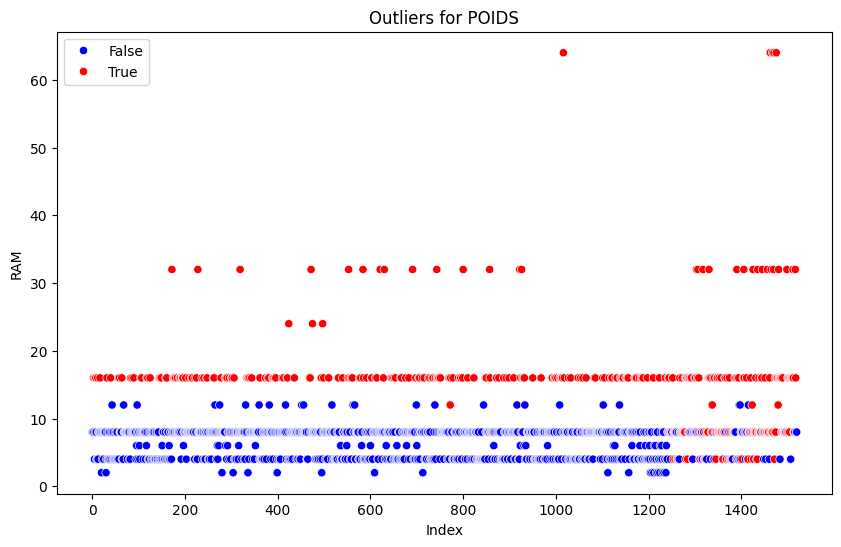

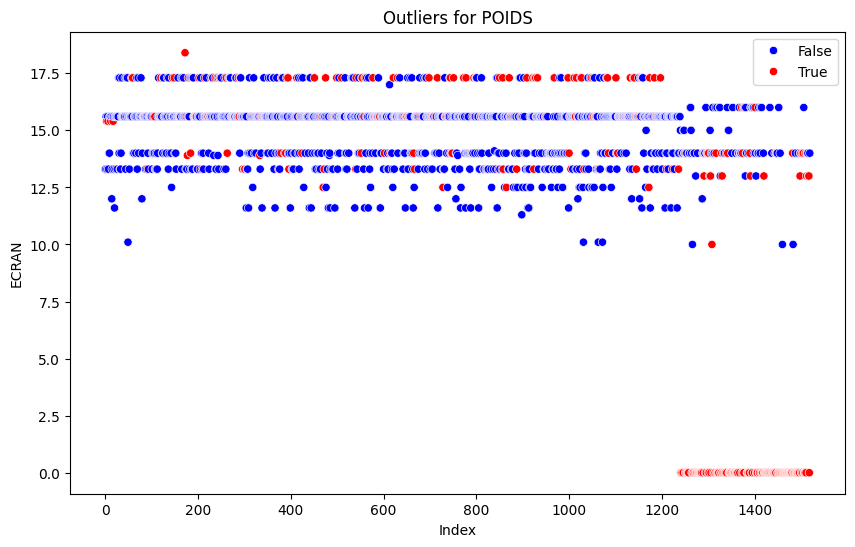

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your dataframe and you have columns: 'PRIX', 'POIDS', 'RAM'
numerical_columns = ['PRIX', 'POIDS', 'RAM','ECRAN']

# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 6))

# Iterate through numerical columns and create box plots
outliers_indices = []
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

    # Detect and store outliers
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    outliers = df[(df[column] < q1 - threshold * iqr) | (df[column] > q3 + threshold * iqr)]
    outliers_indices.extend(outliers.index)
    

plt.show()

# Visualize outliers in a combined scatter plot
for i in range(len(numerical_columns)):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df.index, y=df[numerical_columns[i]], hue=df[numerical_columns[i]].index.isin(outliers_indices), palette={False: 'blue', True: 'red'})
    plt.title(f'Outliers for {numerical_columns[1]}')
    plt.xlabel('Index')
    plt.ylabel(numerical_columns[i])
    plt.show()

# Remove outliers from the dataframe
df_cleaned = df.drop(outliers_indices)
